# Use Case

- Use Case Summary

* **Objective Statement:**

    * Dapatkan pola konsumsi (waktu, intensitas, ukuran, jenis, harga)
    * Untuk mengurangi resiko dalam memutuskan dimana, kapan, bagaimana, dan kepada siapa suatu produk, jasa, atau merek akan dipasarkan.
    * Untuk meningkatkan efisiensi pemasaran dengan mengarahkan upaya secara khusus ke segmen yang ditunjuk dengan cara yang konsisten dengan karakteristik segmen tersebut.
    * Mengetahui berapa banyak produk yang terjual setiap bulan.
    * Mengetahui berapa banyak pelanggan menghabiskan uang mereka setiap bulan.
    
    
* **Challanges** :
 
    * Ubah tipe data kolom yang tidak cocok
    * Menampilkan data setiap tahun
    * Buat definisi dari setiap segmen yang diperoleh
    

* **Methodology / Analytic Technique** :
    * Analisis deskriptif
        * Jelaskan informasi seperti, min/max nilai setiap kolom, rata-rata, dan jumlah total data yang terdapat dalam kolom grand_total.
    * Analisis grafik
        * Lihat perubahan data berdasarkan waktu
        * Menggunakan Pemodelan Segementasi
        * Model RFM
  

* **Business Benefit**:

    * Dapatkan wawasan untuk merawat dan mempertahankan pelanggan berdasarkan segmen
    * Memperoleh wawasan untuk meningkatkan kualitas layanan perusahaan agar pelanggan tetap setia dan mendapatkan keuntungan lebih bagi perusahaan
  
* **Expected Outcome**:

    * Dapatkan saran harga dan ekspektasi rasa, aroma, ukuran, varian, kemasan, legalitas seperti halal, BPOM, PIRT
    * Mengetahui di mana, kapan, bagaimana, dan kepada siapa suatu produk, jasa, atau merek akan dipasarkan.
    * Analisis segmentasi pelanggan.
    * Rekomendasi berdasarkan segmentasi pelanggan.
    * Ketahui berapa banyak produk yang terjual setiap bulan.
    * Mengetahui berapa banyak pelanggan menghabiskan uang mereka setiap bulan.

# Business Understanding

Nichoa adalah perusahaan yang didirikan pada tahun 2018. Nichoa berkomitmen untuk tidak hanya memproduksi cokelat berkualitas, tetapi juga berkontribusi untuk membantu meningkatkan kualitas hidup petani dan konsumen kakao lokal. Nichoa terus melakukan transformasi dan inovasi di bidang teknologi pangan untuk mendukung produksi yang berkelanjutan, serta melakukan improvisasi branding dan pemasaran agar selalu dapat beradaptasi dengan perubahan dan tren.
Selain itu, Nichoa mencoba untuk terus mengukur dampak produk Nichoa terhadap penerima manfaat.

Kasus ini memiliki beberapa pertanyaan bisnis dengan menggunakan data:
* Berapa banyak produk yang terjual untuk setiap bulan di tahun 2021 dan 2022
* Berapa banyak pendapatan yang didapatkan perusahaan dari penjualan untuk tiap bulan di tahun 2021 dan 2022
* Jenis choco drink apa yang paling diminati oleh pelanggan?
* Bagaimana dengan jumlah rata-rata, maksimum dan minimum uang yang didapatkan oleh perusahaan?
* Bagaimana dengan jumlah rata-rata, maksimum dan minimum produk yang dibeli oleh customer?
* Bagaimana perilaku konsumen berdasarkan label yang ditetapkan seperti Loyal Customer, Big Spanders, Best Customers, Lost Cheap Customers dan Almost Lost?
* Bagaimana membangun model menggunakan pemodelan RFM?



# Data Understanding
* *Data Source* :
     * Sumber data : Dataset Nichoa
     * Dataset yang digunakan adalah data dari https://drive.google.com/file/d/1XXslAnWOV5_TK6vFpYb01C7sEBF7mq-P/view?usp=sharing
     * Data Transaksi dimulai pada tanggal 8 Januari 2021 sampai dengan 24 Februari 2022
     * Data mentah berisi 255 baris dan 21 kolom.

*  Data Dictionary :
     * order no : Nomor pesanan yang ditetapkan secara unik untuk setiap pesanan.
     * order_time : waktu pembelian produk
     * brand : nama brand dari produk
     * brand mission rate : rating untuk brand mission perusahaan
     * brand comission amount : jumlah dari brand komisi
     * item group : Jenis produk yang digunakan adalah choco drink
     * item name : Nama Produk dari Choco Drink
     * item sku : barcode tiap produk yang dapat dipindai
     * qty : jumlah pembelian produk
     * currency : mata uang yang dipakai
     * price: harga jual per produk
     * add on price : Penambahan harga pada produk 
     * discount percent : persentase diskon yang diberikan 
     * amount : Penjumlahan total harga yang didapat dari pembelian produk
     * tax amount : pajak dari pendapatan
     * cost perunit : total yang dihabiskan untuk memproduksi satu unit barang
     * total cost : jumlah keseluruhan dari pengeluaran tetap dan pengeluaran variabel yang dikeluarkan perusahaan
     * profit : keuntungan yang didapatkan tiap satu unit produk
     * paid to brand : total pembayaran untuk satu unit produk
     * payment type : tipe pembayaran yang dilakukan 



# Data Preparation

* **Code yang Digunakan**:
    * Python 3.9.10
    * Package: Pandas, Numpy, Matplotlib, Seaborn, Scipy, Sklearn, dan Warning 

# Data Cleansing


  * Ubah tipe data dari urutan objek ke datetime
  * Ambil data hanya bulan dan tahun saja

In [82]:
!pip install feature_engine

# Import Packages

Sebelum melakukan data profiling, data cleansing, EDA, dan modeling diharuskan import packages yang nantinya akan digunakan.

In [83]:
# Importing Package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

# Data Profiling


**Load Dataset**

Untuk menampilkan data yang akan digunakan, kita harus memuat data terlebih dahulu seperti dibawah ini :

In [84]:
olsera = pd.read_csv("C:/Users/lenovo/Documents/ipynb/Data Choco Drink - Nichoa - Sheet1.csv")

**Preview Dataset**

Kita akan menampilkan data yang telah dimuat, akan tertampil seperti dibawah ini dengan jumlah 21 column.

In [85]:
olsera.head()

,order no,order time,brand,brand comission rate,brand comission amount,item group,item name,item sku,qty,currency,...,add-on price,discount percent,discount amount,amount,tax amount,cost perunit,total cost,profit,paid to brand,payment type
0,065321010800000079,2021-01-08 9:35:34,Nichoa,0,0,Choco Drink,Immune Booster Chocodrink - 25 gr,NaN,1,IDR,...,0,0,0,18000,0,9500.0,9500.0,8500.0,18000,BRI Andri Setyowati
1,065321010800000079,2021-01-08 9:35:34,Nichoa,0,0,Choco Drink,Fresh and Fight - 25 gr,Chocodrink SR-0,1,IDR,...,0,0,0,18000,0,7936.0,7936.0,10064.0,18000,BRI Andri Setyowati
2,065321011100000090,2021-01-11 10:21:30,Nichoa,0,0,Choco Drink,Immune Booster Chocodrink - 25 gr,NaN,1,IDR,...,0,0,0,18000,0,9500.0,9500.0,8500.0,18000,BRI Andri Setyowati
3,065321011100000090,2021-01-11 10:21:30,Nichoa,0,0,Choco Drink,Fresh and Fight - 25 gr,Chocodrink SR-0,1,IDR,...,0,0,0,18000,0,7936.0,7936.0,10064.0,18000,BRI Andri Setyowati
4,065321011100000091,2021-01-11 10:22:36,Nichoa,0,0,Choco Drink,Fresh and Fight - 25 gr,Chocodrink SR-0,1,IDR,...,0,0,0,18000,0,7936.0,7936.0,10064.0,18000,BRI Andri Setyowati


# Data Cleansing

**Memilih Kolom yang Ingin Digunakan**

In [86]:
olsera = olsera[["order no","order time","item group","item name","qty",'price',"amount","payment type"]]

**Menambahkan Kolom yang ingin digunakan**

In [87]:
# Order date

olsera['order_time'] = pd.to_datetime(olsera['order time'])
olsera['order_no'] = olsera['order no']
olsera['OrderYearMonth'] = olsera['order_time'].map(lambda date: 100*date.year + date.month)
olsera['Date'] = olsera['order_time'].dt.strftime('%Y-%m')
olsera['Year'] = olsera['order_time'].dt.strftime('%Y')
olsera['Month'] = olsera['order_time'].dt.strftime('%m')
olsera.drop('order time', axis= 1)
olsera.drop('order no', axis= 1)

,order time,item group,item name,qty,price,amount,payment type,order_time,order_no,OrderYearMonth,Date,Year,Month
0,2021-01-08 9:35:34,Choco Drink,Immune Booster Chocodrink - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-08 09:35:34,065321010800000079,202101,2021-01,2021,01
1,2021-01-08 9:35:34,Choco Drink,Fresh and Fight - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-08 09:35:34,065321010800000079,202101,2021-01,2021,01
2,2021-01-11 10:21:30,Choco Drink,Immune Booster Chocodrink - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-11 10:21:30,065321011100000090,202101,2021-01,2021,01
3,2021-01-11 10:21:30,Choco Drink,Fresh and Fight - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-11 10:21:30,065321011100000090,202101,2021-01,2021,01
4,2021-01-11 10:22:36,Choco Drink,Fresh and Fight - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-11 10:22:36,065321011100000091,202101,2021-01,2021,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2022-02-19 9:57:51,Choco Drink,Stress Release - 25 gr,1,18000,18000,Mandiri CV Nutrico Nusantara,2022-02-19 09:57:51,E39422021900000571,202202,2022-02,2022,02
251,2022-02-19 10:07:03,Choco Drink,Stress Release - 25 gr,2,15300,30600,Mandiri CV Nutrico Nusantara,2022-02-19 10:07:03,E39422021900000572,202202,2022-02,2022,02
252,2022-02-21 8:27:37,Choco Drink,Stress Release - 150 gr,1,75000,75000,Mandiri CV Nutrico Nusantara,2022-02-21 08:27:37,E39422022100000576,202202,2022-02,2022,02
253,2022-02-22 15:27:09,Choco Drink,Stress Release - 150 gr,2,75000,150000,Tokopedia,2022-02-22 15:27:09,E39422022200000580,202202,2022-02,2022,02


Kita menggunakan **kolom Date** digunakan sebagai **pemisah antara bulan** Januari dan Februari tahun 2021 dan 2022 bertujuan **untuk lebih memudahkan dalam menganalisis data** agar data pada bulan tersebut tidak tergabung antara yang tahun 2021 dan 2022.

**Dataset Information**

In [88]:
olsera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order no        255 non-null    object        
 1   order time      255 non-null    object        
 2   item group      255 non-null    object        
 3   item name       255 non-null    object        
 4   qty             255 non-null    int64         
 5   price           255 non-null    int64         
 6   amount          255 non-null    int64         
 7   payment type    255 non-null    object        
 8   order_time      255 non-null    datetime64[ns]
 9   order_no        255 non-null    object        
 10  OrderYearMonth  255 non-null    int64         
 11  Date            255 non-null    object        
 12  Year            255 non-null    object        
 13  Month           255 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 28

**Mengecek Missing Value**

In [89]:
olsera.isna().sum()

order no          0
order time        0
item group        0
item name         0
qty               0
price             0
amount            0
payment type      0
order_time        0
order_no          0
OrderYearMonth    0
Date              0
Year              0
Month             0
dtype: int64

Setelah dilakukan pengecekan data, dapat diketahui bahwa tidak ada data yang hilang pada dataset ini dan data sudah cukup lengkap.

**Mengecek Unique Value**

In [90]:
olsera.nunique()

order no          144
order time        144
item group          1
item name           6
qty                11
price               4
amount             15
payment type       10
order_time        144
order_no          144
OrderYearMonth     12
Date               12
Year                2
Month              10
dtype: int64

Dari sini terlihat, total order adalah 144. **Jumlah orde no sama dengan jumlah order time**, sehingga dalam dalam satu waktu order terdapat satu order no yang masuk. Terlihat juga terdapat **6 item** dalam chocodrink dengan begitu terdapat 6 jenis produk yang berbeda dari segi ukuran maupun variannya.

**Menghapus Kolom order time yang double**

In [91]:
olsera.drop('order time', axis= 1, inplace=True)

In [92]:
olsera.head()

,order no,item group,item name,qty,price,amount,payment type,order_time,order_no,OrderYearMonth,Date,Year,Month
0,065321010800000079,Choco Drink,Immune Booster Chocodrink - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-08 09:35:34,065321010800000079,202101,2021-01,2021,01
1,065321010800000079,Choco Drink,Fresh and Fight - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-08 09:35:34,065321010800000079,202101,2021-01,2021,01
2,065321011100000090,Choco Drink,Immune Booster Chocodrink - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-11 10:21:30,065321011100000090,202101,2021-01,2021,01
3,065321011100000090,Choco Drink,Fresh and Fight - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-11 10:21:30,065321011100000090,202101,2021-01,2021,01
4,065321011100000091,Choco Drink,Fresh and Fight - 25 gr,1,18000,18000,BRI Andri Setyowati,2021-01-11 10:22:36,065321011100000091,202101,2021-01,2021,01


**Dataset Description**

In [93]:
olsera.describe()

,qty,price,amount,OrderYearMonth
count,255.000000,255.000000,255.000000,255.000000
mean,2.400000,27065.882353,61964.117647,202115.627451
std,3.648535,20805.237471,106688.443577,29.288788
min,1.000000,15300.000000,18000.000000,202101.000000
25%,1.000000,18000.000000,18000.000000,202102.000000
50%,1.000000,18000.000000,18000.000000,202105.000000
75%,2.000000,18000.000000,75000.000000,202111.000000
max,21.000000,75000.000000,750000.000000,202202.000000


Dapat dilihat dari deskripsi data jika **pembelian paling rendah** dari produk sebanyak **1 buah** dan yang **paling tinggi** sebanyak **21 buah.** Kemudian, mengacu pada harga normalnya, untuk **harga tertinggi yaitu 75000** pada **ukuran choco drink 150 gr,** dan **harga 18000 pada ukuran 25 gr.** Namun, disini kita ketahui bahwa **harga terendah  adalah 15300** sehingga bisa menunjukkan adanya dua hal : terjadinya diskon atau pembelian dari reseller. Kemudian **rata-rata** customers membeli produk chocodrink ini adalah **2 buah.**

In [94]:
olsera.shape

(255, 13)

# Exploratory Data Analysis

>Di bagian ini, kami ingin memeriksa data lebih lanjut dengan memeriksa semua info yang diperlukan, kami telah memeriksa nilai yang hilang, dan dengan demikian membersihkan data sebelum proses EDA. Sehingga dapat divisualisasikan dan diterjemahkan dengan benar dalam proses EDA. Kami memulai ini dengan memuat semua paket yang dibutuhkan dan mengimpor data.

**Mengecek Adanya Outlier**

In [95]:
olsera.describe()

,qty,price,amount,OrderYearMonth
count,255.000000,255.000000,255.000000,255.000000
mean,2.400000,27065.882353,61964.117647,202115.627451
std,3.648535,20805.237471,106688.443577,29.288788
min,1.000000,15300.000000,18000.000000,202101.000000
25%,1.000000,18000.000000,18000.000000,202102.000000
50%,1.000000,18000.000000,18000.000000,202105.000000
75%,2.000000,18000.000000,75000.000000,202111.000000
max,21.000000,75000.000000,750000.000000,202202.000000


**Mengecek Adanya Outlier Pada Kolom qty**

In [96]:
Q1 = np.quantile(olsera['qty'], .25)
Q3 = np.quantile(olsera['qty'], .75)
IQR = Q3-Q1
lower_range = Q1 - (1.5*IQR)
upper_range = Q3 + (1.5*IQR)
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)

Q1: 1.0
Q3: 2.0
IQR: 1.0


In [97]:
out_total = olsera[(olsera['qty']<lower_range)| (olsera['qty']>upper_range)]
out_total

,order no,item group,item name,qty,price,amount,payment type,order_time,order_no,OrderYearMonth,Date,Year,Month
5,065321011100000092,Choco Drink,Fresh and Fight - 25 gr,5,18000,90000,BRI Andri Setyowati,2021-01-11 17:02:09,065321011100000092,202101,2021-01,2021,01
6,065321011100000092,Choco Drink,Immune Booster Chocodrink - 25 gr,5,18000,90000,BRI Andri Setyowati,2021-01-11 17:02:09,065321011100000092,202101,2021-01,2021,01
16,E39421013000000023,Choco Drink,Immune Booster Chocodrink - 25 gr,4,18000,72000,Pembelian Via Shopee,2021-01-30 08:08:35,E39421013000000023,202101,2021-01,2021,01
37,E39421020800000061,Choco Drink,Fresh and Fight - 25 gr,15,18000,270000,BNI Andri Setyowati,2021-02-08 14:19:46,E39421020800000061,202102,2021-02,2021,02
38,E39421020800000061,Choco Drink,Immune Booster Chocodrink - 25 gr,15,18000,270000,BNI Andri Setyowati,2021-02-08 14:19:46,E39421020800000061,202102,2021-02,2021,02
39,E39421020800000061,Choco Drink,Stress Release - 25 gr,15,18000,270000,BNI Andri Setyowati,2021-02-08 14:19:46,E39421020800000061,202102,2021-02,2021,02
70,E39421030300000125,Choco Drink,Fresh and Fight - 25 gr,10,18000,180000,BRI Andri Setyowati,2021-03-03 17:38:29,E39421030300000125,202103,2021-03,2021,03
71,E39421030300000125,Choco Drink,Stress Release - 25 gr,10,18000,180000,BRI Andri Setyowati,2021-03-03 17:38:29,E39421030300000125,202103,2021-03,2021,03
72,E39421030300000125,Choco Drink,Immune Booster Chocodrink - 25 gr,10,18000,180000,BRI Andri Setyowati,2021-03-03 17:38:29,E39421030300000125,202103,2021-03,2021,03
75,E39421031800000157,Choco Drink,Immune Booster Chocodrink - 25 gr,10,18000,180000,Reseller,2021-03-18 16:28:37,E39421031800000157,202103,2021-03,2021,03


In [98]:
out_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 5 to 236
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order no        33 non-null     object        
 1   item group      33 non-null     object        
 2   item name       33 non-null     object        
 3   qty             33 non-null     int64         
 4   price           33 non-null     int64         
 5   amount          33 non-null     int64         
 6   payment type    33 non-null     object        
 7   order_time      33 non-null     datetime64[ns]
 8   order_no        33 non-null     object        
 9   OrderYearMonth  33 non-null     int64         
 10  Date            33 non-null     object        
 11  Year            33 non-null     object        
 12  Month           33 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 3.6+ KB


<AxesSubplot:xlabel='qty'>

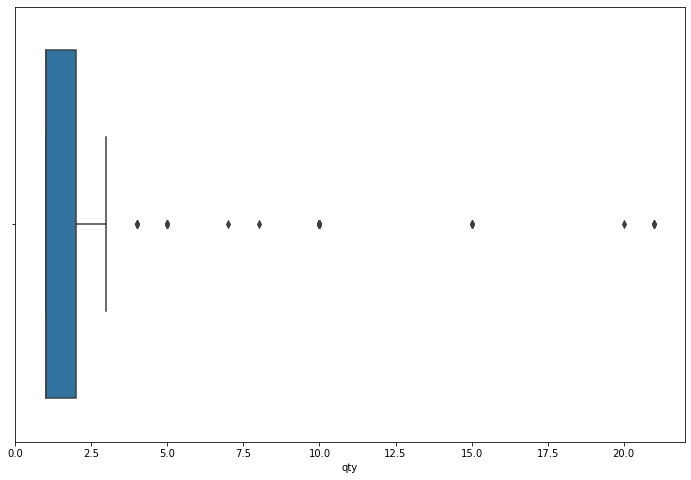

In [99]:
plt.figure(figsize=(12,8))

sns.boxplot(x='qty', data=olsera)

**Boxplot di atas menunjukkan adanya outlier** atau data yang berada diluar dari rentan yang paling banyak dipilih oleh customer. **Untuk kolom qty** ini, customer paling banyak memilih qty di rentan 1 sampai 2 produk. Sehingga diluar dari itu disebut dengan outlier. **Jumlah outlier yang ada pada kolom ini sebanyak 33** atau jika dipersentasekan sebanyak 0.12%

**Mengecek Adanya Outlier pada Kolom amount**

In [100]:
# Hitung nilai Q1 dan Q3
Q1_2 = np.quantile(olsera['amount'], .25)
Q3_2 = np.quantile(olsera['amount'], .75)
IQR = Q3_2-Q1_2
lower_range = Q1_2 - (1.5*IQR)
upper_range = Q3_2 + (1.5*IQR)
print("Q1:",Q1_2)
print("Q3:",Q3_2)
print("IQR:",IQR)

Q1: 18000.0
Q3: 75000.0
IQR: 57000.0


In [101]:
out_total_am= olsera[(olsera['amount']<lower_range)| (olsera['amount']>upper_range)]
out_total_am

,order no,item group,item name,qty,price,amount,payment type,order_time,order_no,OrderYearMonth,Date,Year,Month
37,E39421020800000061,Choco Drink,Fresh and Fight - 25 gr,15,18000,270000,BNI Andri Setyowati,2021-02-08 14:19:46,E39421020800000061,202102,2021-02,2021,02
38,E39421020800000061,Choco Drink,Immune Booster Chocodrink - 25 gr,15,18000,270000,BNI Andri Setyowati,2021-02-08 14:19:46,E39421020800000061,202102,2021-02,2021,02
39,E39421020800000061,Choco Drink,Stress Release - 25 gr,15,18000,270000,BNI Andri Setyowati,2021-02-08 14:19:46,E39421020800000061,202102,2021-02,2021,02
70,E39421030300000125,Choco Drink,Fresh and Fight - 25 gr,10,18000,180000,BRI Andri Setyowati,2021-03-03 17:38:29,E39421030300000125,202103,2021-03,2021,03
71,E39421030300000125,Choco Drink,Stress Release - 25 gr,10,18000,180000,BRI Andri Setyowati,2021-03-03 17:38:29,E39421030300000125,202103,2021-03,2021,03
72,E39421030300000125,Choco Drink,Immune Booster Chocodrink - 25 gr,10,18000,180000,BRI Andri Setyowati,2021-03-03 17:38:29,E39421030300000125,202103,2021-03,2021,03
75,E39421031800000157,Choco Drink,Immune Booster Chocodrink - 25 gr,10,18000,180000,Reseller,2021-03-18 16:28:37,E39421031800000157,202103,2021-03,2021,03
76,E39421031800000157,Choco Drink,Stress Release - 25 gr,10,18000,180000,Reseller,2021-03-18 16:28:37,E39421031800000157,202103,2021-03,2021,03
77,E39421031800000157,Choco Drink,Fresh and Fight - 25 gr,10,18000,180000,Reseller,2021-03-18 16:28:37,E39421031800000157,202103,2021-03,2021,03
111,E39421051100000374,Choco Drink,Stress Release - 150 gr,10,75000,750000,BNI Andri Setyowati,2021-05-11 15:21:03,E39421051100000374,202105,2021-05,2021,05


In [102]:
out_total_am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 37 to 236
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order no        23 non-null     object        
 1   item group      23 non-null     object        
 2   item name       23 non-null     object        
 3   qty             23 non-null     int64         
 4   price           23 non-null     int64         
 5   amount          23 non-null     int64         
 6   payment type    23 non-null     object        
 7   order_time      23 non-null     datetime64[ns]
 8   order_no        23 non-null     object        
 9   OrderYearMonth  23 non-null     int64         
 10  Date            23 non-null     object        
 11  Year            23 non-null     object        
 12  Month           23 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 2.5+ KB


<AxesSubplot:xlabel='amount'>

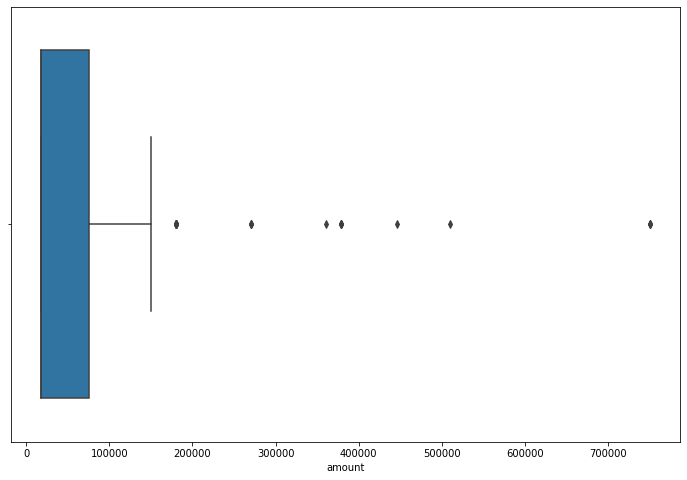

In [103]:
plt.figure(figsize=(12,8))

sns.boxplot(x='amount', data=olsera)

Kita bisa melihat **boxplot di atas menunjukkan adanya outlier pada kolom jumlah pendapatan di tiap transaksi,** yang dimana outlier terjadi jika data berada di luar dari rentan yang paling banyak terjadi transaksi, yaitu 18000 dan 75000. Untuk pendapatan di luar rentan tersebut dinyatakan sebagai outlier. **Jumlah outlier yang ada pada kolom ini sebanyak 23 outlier atau 0.09%**

**Mengecek adanya outlier pada kolom price**

In [104]:
# Hitung nilai Q1 dan Q3
Q1_3 = np.quantile(olsera['price'], .25)
Q3_3 = np.quantile(olsera['price'], .75)
IQR = Q3_3-Q1_3
lower_range = Q1_3 - (1.5*IQR)
upper_range = Q3_3 + (1.5*IQR)
print("Q1:",Q1_3)
print("Q3:",Q3_3)
print("IQR:",IQR)

Q1: 18000.0
Q3: 18000.0
IQR: 0.0


In [105]:
out_total_pr= olsera[(olsera['price']<lower_range)| (olsera['price']>upper_range)]
out_total_pr

,order no,item group,item name,qty,price,amount,payment type,order_time,order_no,OrderYearMonth,Date,Year,Month
12,E39421013000000012,Choco Drink,Stress Release - 150 gr,1,75000,75000,Pembelian Via Shopee,2021-01-30 08:06:22,E39421013000000012,202101,2021-01,2021,01
53,E39421021600000091,Choco Drink,Immune Booster Chocodrink - 150 gr,1,75000,75000,BNI Andri Setyowati,2021-02-16 15:54:49,E39421021600000091,202102,2021-02,2021,02
54,E39421021600000091,Choco Drink,Fresh and Fight - 150 gr,1,75000,75000,BNI Andri Setyowati,2021-02-16 15:54:49,E39421021600000091,202102,2021-02,2021,02
55,E39421021600000091,Choco Drink,Stress Release - 150 gr,1,75000,75000,BNI Andri Setyowati,2021-02-16 15:54:49,E39421021600000091,202102,2021-02,2021,02
56,E39421021600000092,Choco Drink,Fresh and Fight - 150 gr,1,75000,75000,BRI Andri Setyowati,2021-02-16 17:26:36,E39421021600000092,202102,2021-02,2021,02
67,065321022700000111,Choco Drink,Immune Booster Chocodrink - 150 gr,1,75000,75000,BRI Andri Setyowati,2021-02-27 17:54:37,065321022700000111,202102,2021-02,2021,02
68,065321022700000111,Choco Drink,Stress Release - 150 gr,1,75000,75000,BRI Andri Setyowati,2021-02-27 17:54:37,065321022700000111,202102,2021-02,2021,02
69,E39421030300000126,Choco Drink,Immune Booster Chocodrink - 150 gr,2,75000,150000,BRI Andri Setyowati,2021-03-03 17:43:28,E39421030300000126,202103,2021-03,2021,03
86,E39421032300000170,Choco Drink,Stress Release - 150 gr,1,75000,75000,BNI Andri Setyowati,2021-03-23 18:36:24,E39421032300000170,202103,2021-03,2021,03
87,E39421032900000184,Choco Drink,Stress Release - 150 gr,1,75000,75000,Reseller,2021-03-29 09:46:52,E39421032900000184,202103,2021-03,2021,03


In [106]:
out_total_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 12 to 254
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order no        42 non-null     object        
 1   item group      42 non-null     object        
 2   item name       42 non-null     object        
 3   qty             42 non-null     int64         
 4   price           42 non-null     int64         
 5   amount          42 non-null     int64         
 6   payment type    42 non-null     object        
 7   order_time      42 non-null     datetime64[ns]
 8   order_no        42 non-null     object        
 9   OrderYearMonth  42 non-null     int64         
 10  Date            42 non-null     object        
 11  Year            42 non-null     object        
 12  Month           42 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 4.6+ KB


<AxesSubplot:xlabel='price'>

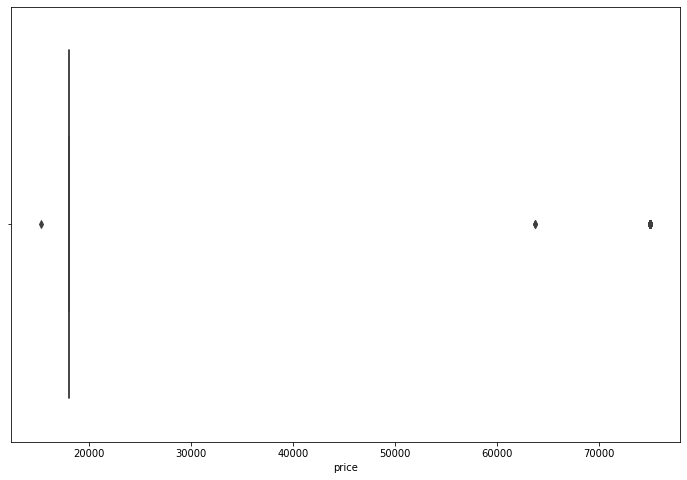

In [107]:
plt.figure(figsize=(12,8))

sns.boxplot(x='price', data=olsera)

Untuk tampilan **boxplot di atas cukup unik, rentan untuk kolom price ini tidak ada,** hal ini terjadi dikarenakan tidak hampir semua customer memilih untuk berbelanja produk yang harganya sama yaitu 18000, untuk harga diluar itu disebut dengan data outlier. **Kolom ini memiliki 42 outlier atau 0.16%** dari data keseluruhan 

**Berapa banyak produk yang terjual tiap bulannya?**

In [108]:
olsera_agg = olsera.groupby(["Year", "Date"]).order_no.count()
olsera_agg

Year  Date   
2021  2021-01    26
      2021-02    43
      2021-03    25
      2021-04    15
      2021-05    22
      2021-08    18
      2021-09    21
      2021-10    17
      2021-11    23
      2021-12    19
2022  2022-01     8
      2022-02    18
Name: order_no, dtype: int64

In [109]:
#converting series to dataframe and resetting index.

olsera_agg = pd.DataFrame(olsera_agg)
olsera_agg = olsera_agg.reset_index()
olsera_agg

,Year,Date,order_no
0,2021,2021-01,26
1,2021,2021-02,43
2,2021,2021-03,25
3,2021,2021-04,15
4,2021,2021-05,22
5,2021,2021-08,18
6,2021,2021-09,21
7,2021,2021-10,17
8,2021,2021-11,23
9,2021,2021-12,19


In [110]:
total_counts_agg = olsera_agg['order_no'].sum()
total_counts_agg

255

In [111]:
olsera_agg['Date'][olsera_agg['Date']=='2021-01'] ='2021 Jan'
olsera_agg['Date'][olsera_agg['Date']=='2021-02'] ='2021 Feb'
olsera_agg['Date'][olsera_agg['Date']=='2021-03'] ='2021 Mar'
olsera_agg['Date'][olsera_agg['Date']=='2021-04'] ='2021 Apr'
olsera_agg['Date'][olsera_agg['Date']=='2021-05'] ='2021 May'
olsera_agg['Date'][olsera_agg['Date']=='2021-06'] ='2021 Jun'
olsera_agg['Date'][olsera_agg['Date']=='2021-07'] ='2021 Jul'
olsera_agg['Date'][olsera_agg['Date']=='2021-08'] ='2021 Aug'
olsera_agg['Date'][olsera_agg['Date']=='2021-09'] ='2021 Sep'
olsera_agg['Date'][olsera_agg['Date']=='2021-10'] ='2021 Oct'
olsera_agg['Date'][olsera_agg['Date']=='2021-11'] ='2021 Nov'
olsera_agg['Date'][olsera_agg['Date']=='2021-12'] ='2021 Dec'
olsera_agg['Date'][olsera_agg['Date']=='2022-01'] ='2022 Jan'
olsera_agg['Date'][olsera_agg['Date']=='2022-02'] ='2022 Feb'

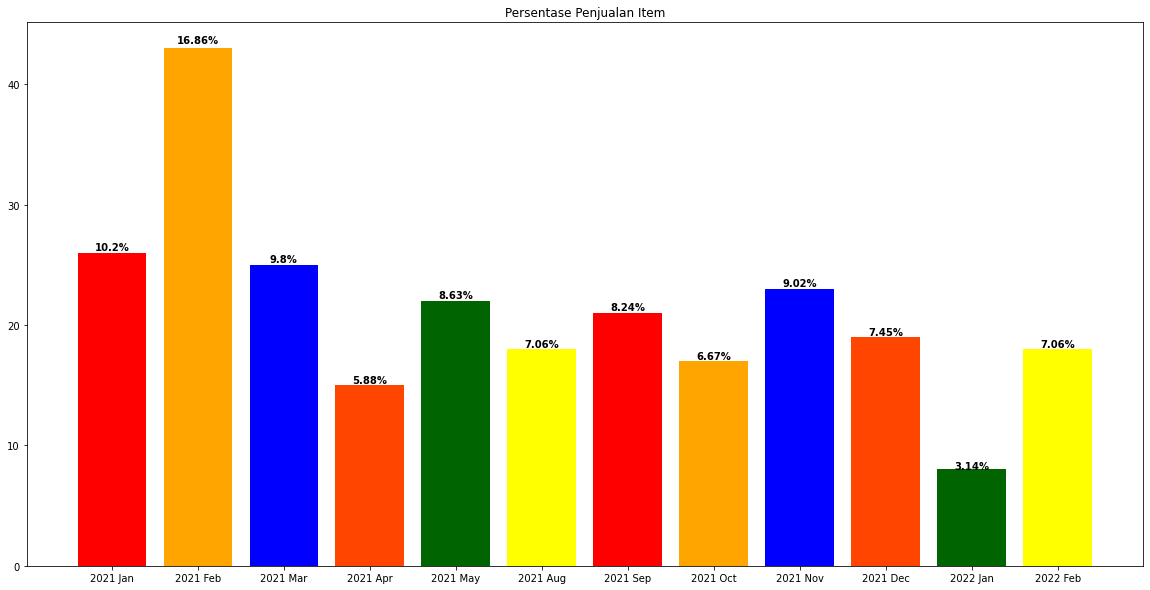

In [112]:
percentage = []
for i in range(olsera_agg.shape[0]):
    pct = (olsera_agg['order_no'][i] / total_counts_agg) * 100
    percentage.append(round(pct,2))
olsera_agg['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(20,10))
colors_list = ['Red','Orange', 'Blue', 'OrangeRed', 'DarkGreen', 'Yellow']
graph = plt.bar(olsera_agg['Date'],olsera_agg['order_no'], color = colors_list)
plt.title('Persentase Penjualan Item')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(olsera_agg['Percentage'][i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

Dari diagram tersebut, menunjukkan bahwa penjualan mengalami naik-turun tiap bulannya. Namun, terjadi peningkatan yang sangat tinggi di salah satu bulannya, **penjualan paling tinggi yakni di bulan Februari 2021 dengan persentase 17% dari total penjualan.** Hal ini bisa saja terjadi, mengingat pada Februari adalah bulan yang terdapat hari valentine indentik dengan coklat. Sehingga pada bulan ini penjualan produk choco drink juga meningkat. Mereka membeli produk choco drink ini baik untuk diri sendiri, pasangan, teman, maupun keluarga mereka sebagai tanda hari kasih sayang.


Dan di **bulan Januari 2022 produk terjual sebanyak 3%,** bulan ini merupakan **penjualan terendah** dari bulan-bulan lainnya. Hal ini bisa terjadi dikarenakan kurangnya promosi oleh tim marketing Nichoa, baik secara offline maupun online. Sebenarnya di bulan Januari bisa menjadi kesempatan untuk meningkatkan penjualan karena bisa memanfaatkan momentum tahun baru dengan memberikan diskon tahun baru.

**Berapa banyak uang yang dibelanjakan customer di setiap bulannya?**

In [113]:
olsera_rev = olsera.groupby(["Year", "Date"]).amount.sum()
olsera_rev

Year  Date   
2021  2021-01     741000
      2021-02    1944000
      2021-03    1833000
      2021-04     654000
      2021-05    4266000
      2021-08     414000
      2021-09    1170000
      2021-10     507000
      2021-11     834000
      2021-12    1299000
2022  2022-01    1235250
      2022-02     903600
Name: amount, dtype: int64

In [114]:
olsera_rev = pd.DataFrame(olsera_rev)
olsera_rev = olsera_rev.reset_index()
olsera_rev

,Year,Date,amount
0,2021,2021-01,741000
1,2021,2021-02,1944000
2,2021,2021-03,1833000
3,2021,2021-04,654000
4,2021,2021-05,4266000
5,2021,2021-08,414000
6,2021,2021-09,1170000
7,2021,2021-10,507000
8,2021,2021-11,834000
9,2021,2021-12,1299000


In [115]:
total_counts_rev = olsera_rev['amount'].sum()
total_counts_rev

15800850

In [116]:
olsera_year = olsera.groupby(olsera.order_time.dt.year).amount.sum()
olsera_year = pd.DataFrame(olsera_year)
olsera_year = olsera_year.reset_index()
olsera_year.head()

,order_time,amount
0,2021,13662000
1,2022,2138850


In [117]:
olsera_rev['Date'][olsera_rev['Date']=='2021-01'] ='2021 Jan'
olsera_rev['Date'][olsera_rev['Date']=='2021-02'] ='2021 Feb'
olsera_rev['Date'][olsera_rev['Date']=='2021-03'] ='2021 Mar'
olsera_rev['Date'][olsera_rev['Date']=='2021-04'] ='2021 Apr'
olsera_rev['Date'][olsera_rev['Date']=='2021-05'] ='2021 May'
olsera_rev['Date'][olsera_rev['Date']=='2021-06'] ='2021 Jun'
olsera_rev['Date'][olsera_rev['Date']=='2021-07'] ='2021 Jul'
olsera_rev['Date'][olsera_rev['Date']=='2021-08'] ='2021 Aug'
olsera_rev['Date'][olsera_rev['Date']=='2021-09'] ='2021 Sep'
olsera_rev['Date'][olsera_rev['Date']=='2021-19'] ='2021 Oct'
olsera_rev['Date'][olsera_rev['Date']=='2021-11'] ='2021 Nov'
olsera_rev['Date'][olsera_rev['Date']=='2021-12'] ='2021 Dec'
olsera_rev['Date'][olsera_rev['Date']=='2022-01'] ='2022 Jan'
olsera_rev['Date'][olsera_rev['Date']=='2022-02'] ='2022 Feb'

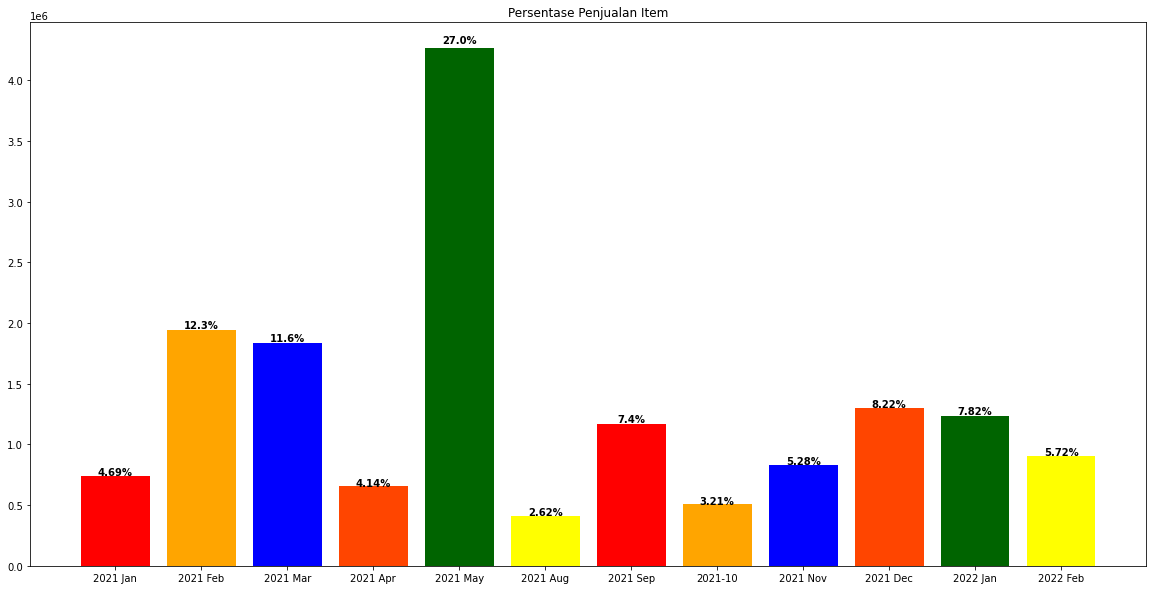

In [118]:
percentage = []
for i in range(olsera_rev.shape[0]):
    pct = (olsera_rev['amount'][i] / total_counts_rev) * 100
    percentage.append(round(pct,2))
olsera_rev['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(20,10))
colors_list = ['Red','Orange', 'Blue', 'OrangeRed', 'DarkGreen', 'Yellow']
graph = plt.bar (olsera_rev['Date'],olsera_rev['amount'], color = colors_list)
plt.title('Persentase Penjualan Item')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(olsera_rev['Percentage'][i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

Pada diagram diatas, bisa di lihat Untuk pendapatan yang didapat tiap bulannya, yakni **amoun**t (total harga yang didapat dari pembelian produk) selama **14 bulan adalah sebesar Rp15.800.850**, yang dimana **pendapatan di tahun  2021** sebanyak Rp13.662.000 atau dalam dipersenkan sebesar **86.46%** dan di **tahun 2022** sebanyak Rp 2.138.850 atau **13.79%**. Dari total tersebut didapatkan pada bulan januari 2021 sebesar 4.69% kemudian mengalami kenaikan pada bulan february yaitu sebesar 12.3% dan kembali turun pada bulan maret dan april sebesar 11.6% dan 4.14%. Bulan selanjutnya **naik pesat sebesar 27%**, bulan ini merupakan bulan dengan pendapatan paling tinggi dibandingkan dengan bulan lainnya,  Hal ini terjadi karena dibulan tersebut terdapat moment Ramadhan dan Idul Fitri yang mendorong customers untuk membeli produk dengan size yang besar dan dalam jumlah banyak sebagai stok dalam menjalani ibadah puasa dan Lebaran, mengingat choco drink merupakan minuman coklat yang sehat untuk tubuh sehingga sangat cocok untuk di konsumsi oleh orang yang berpuasa. Setelah itu di **bulan agustus pendapatan kembali menurun, dengan penurunan yang cukup pesat yaitu sebesar 2.62%**, untuk bulan selanjutnya pendapatan yang didapatkan kadang mengalami kenaikan dan penurunan dengan tidak signifikan

**Mendapatkan pola konsumsi (waktu, intensitas, ukuran, jenis, harga)**

  * Mengetahui Jenis Choco Drink yang paling diminati Customer

In [119]:
olsera_vc = olsera['item name'].value_counts()
olsera_vc

Stress Release - 25 gr                82
Fresh and Fight - 25 gr               78
Immune Booster Chocodrink - 25 gr     54
Stress Release - 150 gr               23
Fresh and Fight - 150 gr              11
Immune Booster Chocodrink - 150 gr     7
Name: item name, dtype: int64

In [120]:
olsera_vc = pd.DataFrame({'Item_name':olsera_vc.index, 'count':olsera_vc.values})
olsera_vc

,Item_name,count
0,Stress Release - 25 gr,82
1,Fresh and Fight - 25 gr,78
2,Immune Booster Chocodrink - 25 gr,54
3,Stress Release - 150 gr,23
4,Fresh and Fight - 150 gr,11
5,Immune Booster Chocodrink - 150 gr,7


In [121]:
total_counts = olsera_vc['count'].sum()
total_counts

255

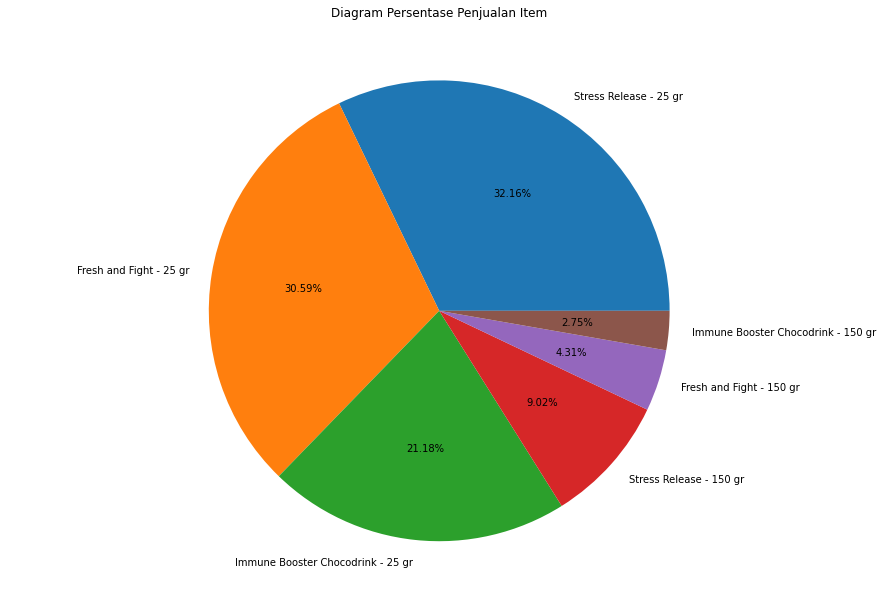

In [122]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
ax.axis('equal')
ax.pie(olsera_vc['count'],labels=olsera_vc['Item_name'],autopct='%1.2f%%')
ax.set_title('Diagram Persentase Penjualan Item')
plt.show()

Pada Barchart di atas dapat dilihat item apa yang paling diminati oleh customer. Pada Choco drink ini terdapat 6 macam item yaitu Immune booster chocodrink 25 gr, fresh and fight 25 gr, stress release 25 gr, stress release 150 gr, immune booster chocodrink 150 gr, dan fresh and fight 150 gr. 
Dapat di lihat bahwa paling banyak terjual adalah item stress release 25 gr, dan yang paling sedikit terjual adalah  immune booster chocodrink 150 gr. 
Hal ini terjadi karena produk dengan kuantitas sedikit lebih praktis untuk dibawa sehingga customer lebih memilih untuk membeli yang ukuran kecil. Selain itu item yang paling laris dan diminati adalah  stress release , kemudian fresh and fight, kemudian immune booster dengan hal ini mungkin untuk immune booster agak kurang diminati karena biasanya orang membeli ketika kurang enak badan. Sedangkan yang stress release banyak sekali customernya karena bisa membantu mengurangi rasa stress.

**Mengetahui Persentase Kuantitas Produk yang dibelanjakan Customer**

In [123]:
olsera_qy = olsera['qty'].value_counts()
olsera_qy

1     178
2      38
10     13
5       6
3       6
4       4
21      4
15      3
20      1
8       1
7       1
Name: qty, dtype: int64

In [124]:
olsera_qy = pd.DataFrame({'Quantity':olsera_qy.index, 'count':olsera_qy.values})
olsera_qy

,Quantity,count
0,1,178
1,2,38
2,10,13
3,5,6
4,3,6
5,4,4
6,21,4
7,15,3
8,20,1
9,8,1


In [125]:
olsera_qy['Quantity'] = olsera_qy['Quantity'].astype(str)

In [126]:
total_counts_qy = olsera_qy['count'].sum()
total_counts_qy

255

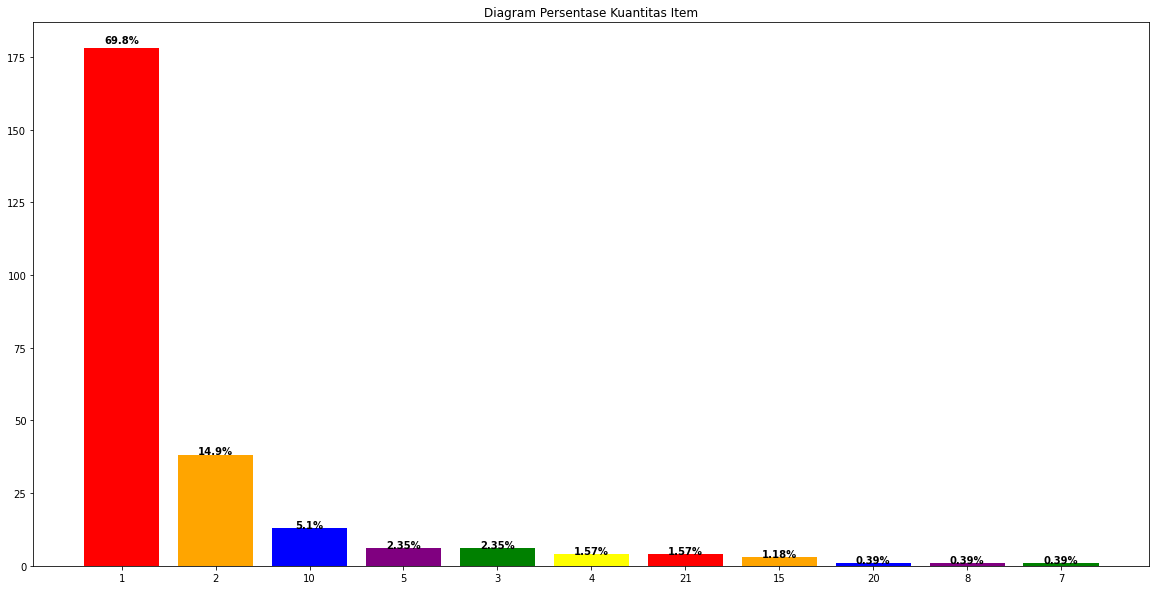

In [127]:
percentage = []
for i in range(olsera_qy.shape[0]):
    pct = (olsera_qy['count'][i] / total_counts_qy) * 100
    percentage.append(round(pct,2))
olsera_qy['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(20,10))
colors_list = ['Red','Orange', 'Blue', 'Purple', 'Green', 'Yellow']
graph = plt.bar(olsera_qy['Quantity'],olsera_qy['count'], color = colors_list)
plt.title('Diagram Persentase Kuantitas Item')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(olsera_qy['Percentage'][i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

Dari diagram diatas dapat kita lihat bahwa sebanyak **69,8% customers membeli produk chocodrink dengan 1 buah.** Sedangkan untuk pembelian produk chocodrink dengan pembelian beberapa buah cenderung relatif sedikit dan berbeda cukup jauh dari pembelian produk satuan. Sehingga dari sini kita tahu bahwa **lebih banyak customers yang tertarik membeli chocodrink untuk diri sendiri.**

Terdapat juga pembelian dengan jumlah yang cukup banyak, seperti **pembelian dengan 21 buah sebanyak 1,57%, 15 buah sebanyak 1,18%, dan 10 buah sebanyak 5,1%.** Ini bisa terjadi dikarenakan adanya **reseller dengan jumlah pembelian yang banyak.**



**Mengetahui Harga yang Diminati Customer**

In [128]:
olsera_pr = olsera['price'].value_counts()

In [129]:
olsera_pr = pd.DataFrame({'Price':olsera_pr.index, 'count':olsera_pr.values})
olsera_pr

,Price,count
0,18000,213
1,75000,39
2,63750,2
3,15300,1


In [130]:
olsera_pr['Price'] = olsera_pr['Price'].astype(str)

In [131]:
total_counts_pr = olsera_pr['count'].sum()
total_counts_pr

255

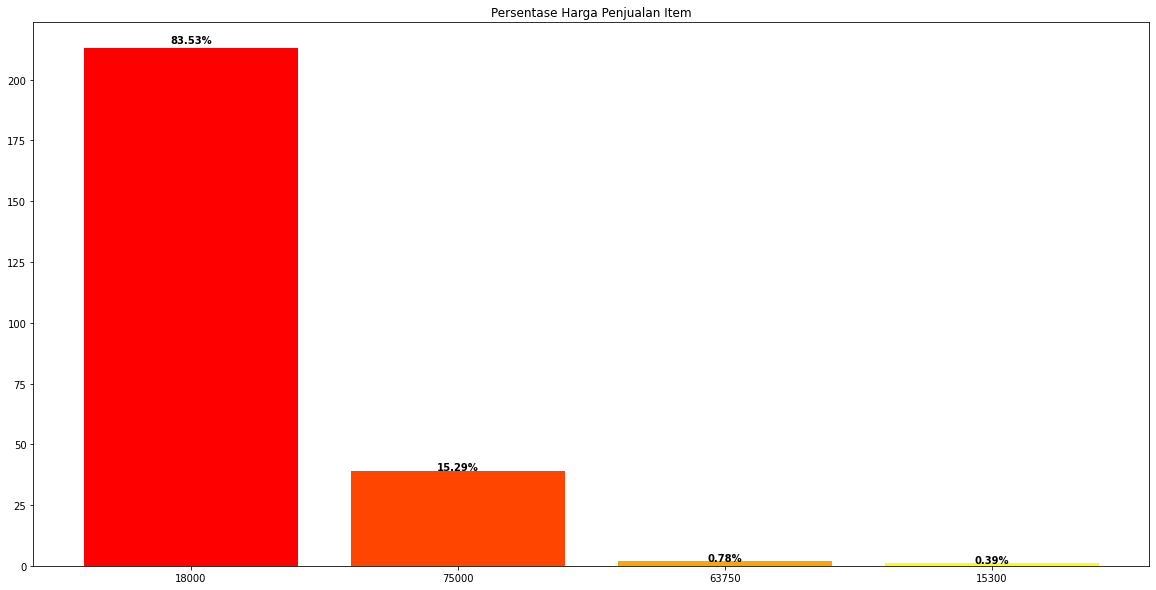

In [132]:
percentage = []
for i in range(olsera_pr.shape[0]):
    pct = (olsera_pr['count'][i] / total_counts_pr) * 100
    percentage.append(round(pct,2))
olsera_pr['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(20,10))
color_list = ['Red','OrangeRed','Orange', 'Yellow']
graph = plt.bar(olsera_pr['Price'],olsera_pr['count'], color = color_list)
plt.title('Persentase Harga Penjualan Item')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(olsera_pr['Percentage'][i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

Dari analisis diatas, kita ketahui bahwa produk Chocodrink Nichoa yang **banyak terjual** adalah produk dengan harga **18000** yakni sebanyak **213 buah, dengan persentase 83,53%.** Sehingga dapat kita ketahui bahwa customers lebih tertarik untuk membeli produk dengan harga yang relatif lebih murah. Hal ini dapat digunakan sebagai acuan untuk lebih banyak meningkatkan produksi choco drink dengan range harga yang lebih murah.

**Mengetahui Tipe Pembayaran yang paling banyak menyumbang pendapatan**

In [133]:
olsera_pt = olsera.groupby(olsera['payment type']).amount.sum()
olsera_pt = pd.DataFrame(olsera_pt)
olsera_pt = olsera_pt.reset_index()
olsera_pt

,payment type,amount
0,BNI Andri Setyowati,6714000
1,BRI Andri Setyowati,1530000
2,Bukalapak,492000
3,CASH,471000
4,Endorsment,396000
5,Mandiri CV Nutrico Nusantara,2234850
6,Pembelian Via Shopee,1554000
7,Reseller,942000
8,Sample Product dan Hadiah,819000
9,Tokopedia,648000


In [134]:
total_counts_pt = olsera_pt['amount'].sum()
total_counts_pt

15800850

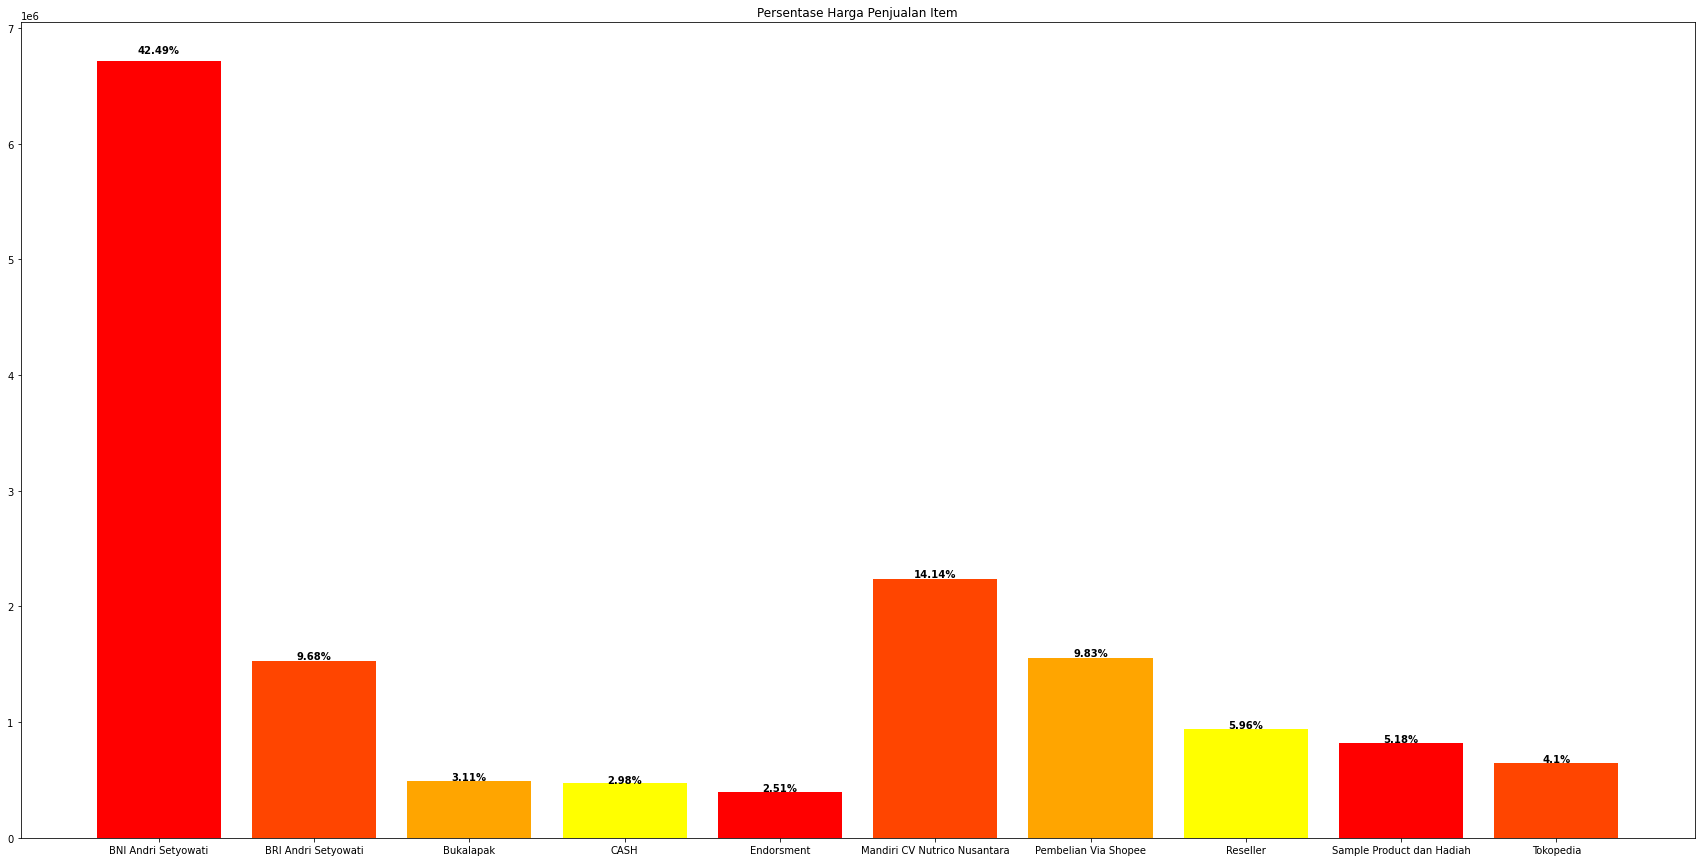

In [135]:
percentage = []
for i in range(olsera_pt.shape[0]):
    pct = (olsera_pt['amount'][i] / total_counts_pt) * 100
    percentage.append(round(pct,2))
olsera_pt['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(30,15))
color_list = ['Red','OrangeRed','Orange', 'Yellow']
graph = plt.bar(olsera_pt['payment type'], olsera_pt['amount'], color = color_list)
plt.title('Persentase Harga Penjualan Item')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(olsera_pt['Percentage'][i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

Terlihat pada analisis di atas jika **tipe pembayaran yang paling banyak digunakan oleh customer ada transfer bank** baik itu melalui bank BNI (42.49%), Mandiri (14.14%) dan BRI (9.68%), kemudian disusul pembelian lewat shopee (9.83%), lalu pembelian oleh reseller (5.96%), sample product dan hadiah (5.18%), tokopedia (4.1%), bukalapak(3.11%), cash(2.98%), dan terakhir pembelian paling sedikit melalui endorsment (2.51%). Sehingga banyak customers lebih suka melakukan transaksi pembayaran melalui transfer antar bank karena tentu lebih praktis daripada harus menyediakan uang cash.

# RFM Analysis

RFM analysis adalah sebuah singkatan dari recency, frequency, dan monetary value. Analisis ini berguna untuk proses segmentasi pelanggan secara efektif.

* Recency menunjukkan waktu interaksi terakhir pelanggan dengan produk atau layanan Anda. Recency bisa menganalisis data mengenai transaksi terakhir pelanggan (pembelian terakhir), kunjungan ke website produk, penggunaan aplikasi mobile, hingga engagement yang pelanggan lakukan lewat media sosial (misalnya jumlah like dan SoV). 

* Frequency  mengacu pada berapa kali pelanggan berinteraksi dengan produk atau melakukan transaksi dalam periode waktu tertentu (customer life cycle). Frekuensi menjadi salah satu tolok ukur analisis karena bisa menunjukkan tingkat customer engagement terhadap brand (brand engagement). Selain itu, frequency juga bisa mengukur tingkat customer loyalty, brand loyalty, hingga customer retention. Monetary Value Metrik monetary value menunjukkan jumlah total yang pelanggan habiskan untuk membeli produk dalam periode waktu tertentu. 

* Monetary  merupakan metrik yang penting. Sebab pelanggan yang membelanjakan uangnya dalam jumlah besar cenderung akan membelanjakan lebih banyak lagi uangnya di masa mendatang.

In [136]:
# Timebound

print(olsera['order_time'].min())
print(olsera['order_time'].max())

2021-01-08 09:35:34
2022-02-24 16:08:23


Tanggal transaksi terakhir adalah 24-02-2022, kita akan gunakan tanggal ini untuk menghitung recency

In [137]:
NOW = dt.date(2022,2,24) 
olsera['Date'] = pd.DatetimeIndex(olsera.order_time).date

In [138]:
# Recency

olsera_recency = olsera.groupby(['order no'],as_index=False)['Date'].max()
olsera_recency.columns = ['order no','Last_Purchase_Date']

olsera_recency['Recency'] = olsera_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
olsera_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
olsera_recency.head()

,order no,Recency
0,065321010800000079,412
1,065321011100000090,409
2,065321011100000091,409
3,065321011100000092,409
4,065321011100000093,409


In [139]:
# Frequency - Monetary

FM_Table = olsera.groupby('order no').agg({'order no':lambda x:len(x),
                                        'amount':lambda x:x.sum()})
FM_Table.rename(columns = {'order no' :'Frequency',
                           'amount':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
order no,,
065321010800000079,2,36000
065321011100000090,2,36000
065321011100000091,1,18000
065321011100000092,2,180000
065321011100000093,1,18000


In [140]:
RFM_Table = olsera_recency.merge(FM_Table,left_on='order no',right_on='order no')
RFM_Table.head()

,order no,Recency,Frequency,Monetary
0,065321010800000079,412,2,36000
1,065321011100000090,409,2,36000
2,065321011100000091,409,1,18000
3,065321011100000092,409,2,180000
4,065321011100000093,409,1,18000


Dari sini kita dapat melihat bahwa **customer** dengan order no **'065321010800000079' melakukan pembelian sekitar 412 hari yang lalu dihitung dari 24 Februari 2022** dengan jumlah produk choco drink **sebanyak 2 buah** dan total pembayaran **Rp. 36000** dengan membeli choco drink dengan **ukuran 25 gr,** sedangkan **customer** dengan order no **'065321011100000091' melakukan pembelian sekitar 409 hari yang lalu dihitung dari 24 Februari 2022** dengan jumlah produk choco drink sebanyak **1 buah** dan total pembayaran **Rp. 18000** membeli choco drink dengan **ukuran 25 gr.**

# Modeling Data: RFM Quantiles

* Sekarang kami membagi metrik menjadi beberapa segmen menggunakan kuantil.
 * Kami akan menetapkan skor dari 1 hingga 4 untuk masing-masing Recency, Frequency, dan Monetery.
 * 1 adalah nilai tertinggi, dan 4 adalah nilai terendah.
 * Skor akhir RFM (Nilai Keseluruhan) dihitung dengan menggabungkan angka skor RFM individual.

In [141]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [142]:
segmented_rfm = RFM_Table.copy()

In [143]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [144]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,order no,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,065321010800000079,412,2,36000,4,3,3
1,065321011100000090,409,2,36000,4,3,3
2,065321011100000091,409,1,18000,4,4,4
3,065321011100000092,409,2,180000,4,3,1
4,065321011100000093,409,1,18000,4,4,4


In [145]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [146]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile', 'F_quartile', 'M_quartile']].sum(axis=1)

In [147]:
segmented_rfm.head()

,order no,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,065321010800000079,412,2,36000,4,3,3,433,10
1,065321011100000090,409,2,36000,4,3,3,433,10
2,065321011100000091,409,1,18000,4,4,4,444,12
3,065321011100000092,409,2,180000,4,3,1,431,8
4,065321011100000093,409,1,18000,4,4,4,444,12


**Semakin besar angka di R_quartile,** maka itu membuktikan bahwa pelanggan semakin **lama tidak berbelanja.** Sedangkan **semakin kecil** angka pada **R_quartile,** membuktikan bahwa pelanggan **semakin baru berbelanja.**

Dari contoh ini terlihat, **customer** dengan order no **'065321010800000079'  terakhir berbelanja 412 hari yang lalu,** karena **sudah lama,** dia mendapatkan **R_quartile 4,** sedangkan **order number '06C921081000000176' terakhir berbelanja 198 hari yang lalu, dia mendapatkan R_quartile 3.**

**Semakin besar angka di F_quartile,** maka membuktikan bahwa pelanggan **semakin jarang berbelanja.** sedangkan **semakin kecil angka di F_quartile,** membuktikan bahwa pelanggan **semakin sering berbelanja dan membeli dengan jumlah barang yang banyak.**

Begitu juga untuk **M_quartile, semakin besar angka di M_quartile,** maka membuktikan bahwa pelanggan **semakin kecil jumlah yang dibelanjakan.** sedangkan **semakin kecil angka dalam M_quartile,** membuktikan bahwa pelanggan **semakin banyak mengeluarkan uang untuk berbelanja.**

## Labeling

In [148]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  5
Loyal Customers:  28
Big Spenders:  34
Almost Lost:  0
Lost Customers:  4
Lost Cheap Customers:  7


In [149]:
label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [150]:
segmented_rfm['Label'] = label

In [151]:
segmen_rfm = segmented_rfm['Label'].value_counts()
segmen_rfm

Others                  87
Loyal Customers         23
Big Spenders            18
Lost Cheap Customers     7
Best Customers           5
Lost Customers           4
Name: Label, dtype: int64

In [152]:
segmen_rfm = pd.DataFrame({'Segmen_RFM':segmen_rfm.index, 'count':segmen_rfm.values})
segmen_rfm

,Segmen_RFM,count
0,Others,87
1,Loyal Customers,23
2,Big Spenders,18
3,Lost Cheap Customers,7
4,Best Customers,5
5,Lost Customers,4


In [153]:
total_counts_rfm = segmen_rfm['count'].sum()
total_counts_rfm

144

In [154]:
Others = 87
Loyal_Customers = 23
Big_Spenders = 18
Lost_Cheap_Customers = 7
Lost_Customers = 4
Best_Customers = 5

total = Others + Loyal_Customers + Big_Spenders + Lost_Cheap_Customers + Lost_Customers + Best_Customers 

p_other = Others / total * 100
p_loyal = Loyal_Customers / total * 100
p_big = Big_Spenders / total * 100
p_lcc = Lost_Cheap_Customers / total * 100
p_lc = Lost_Customers / total * 100
p_best = Best_Customers / total * 100
print(f"Persentase 'Others' sebesar {p_other}%")
print(f"Persentase 'Loyal Customers' sebesar {p_loyal}%")
print(f"Persentase 'Big Spenders' sebesar {p_big}%")
print(f"Persentase 'Lost Cheap Customers' sebesar {p_lcc}%")
print(f"Persentase 'Lost Customers' sebesar {p_lc}%")
print(f"Persentase 'Best Customers' sebesar {p_best}%")

Persentase 'Others' sebesar 60.416666666666664%
Persentase 'Loyal Customers' sebesar 15.972222222222221%
Persentase 'Big Spenders' sebesar 12.5%
Persentase 'Lost Cheap Customers' sebesar 4.861111111111112%
Persentase 'Lost Customers' sebesar 2.7777777777777777%
Persentase 'Best Customers' sebesar 3.4722222222222223%


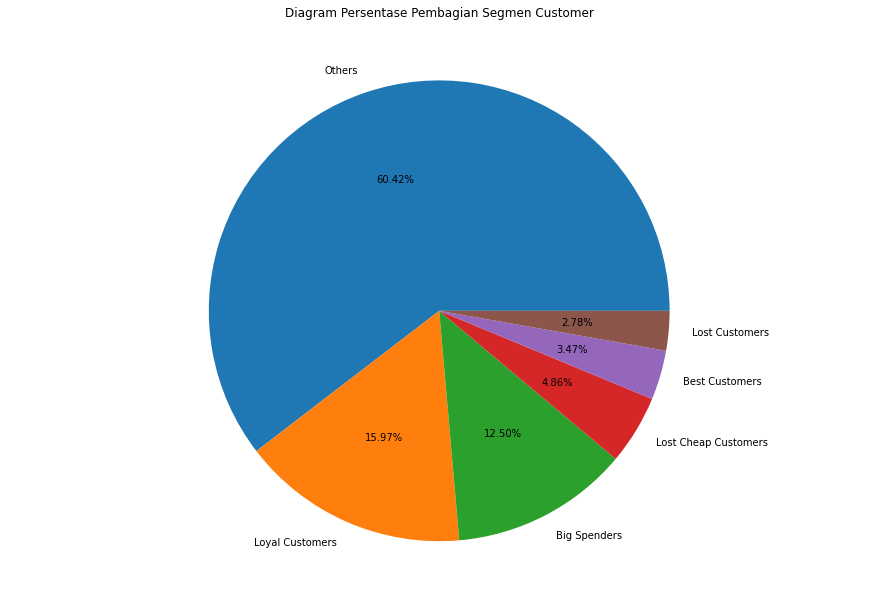

In [155]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
ax.axis('equal')
ax.pie(segmen_rfm['count'],labels=segmen_rfm['Segmen_RFM'],autopct='%1.2f%%')
ax.set_title('Diagram Persentase Pembagian Segmen Customer')
plt.show()

* Berdasarkan hasil pemodelan segmentasi pelanggan menggunakan RFM, **pelanggan** perusahaan **dibagi** menjadi **6 segmen,** yaitu **Loyal Customers, Big Spenders, Lost Cheap Customers, Lost Customers, Best Customers, dan lain-lain.**

* Sebanyak **15,97%** dari total pelanggan (dengan total **23 customer**) termasuk dalam **Loyal Customer** dimana pelanggan segmen ini memiliki **frekuensi berbelanja paling banyak** dibandingkan segmen lainnya.

* Selanjutnya, **12,50%** dari total pelanggan (dengan total **18 customer**) di perusahaan masuk ke segmen **Big Spenders.** Segmen ini memiliki total **pembelian tertinggi** dibanding segmen lainnya.

* Segmen **Lost Cheap Customers** terdiri dari **7 customer** dengan persentase **4,86%** dari total pelanggan. **Pelanggan** yang masuk ke segmen jenis ini cenderung **melakukan churn** karena sudah **lama tidak membeli barang** dari perusahaan, memiliki **frekuensi belanja yang paling sedikit,** dan memiliki **total pembelian yang paling sedikit** dibandingkan segmen lainnya.

* Kemudian sebanyak **3.47%** dari total pelanggan (dengan total **5 customer**) tergolong **Lost Customer** yang **hampir sama** dengan pelanggan di segmen **Lost Cheap Customers, Lost Customer cenderung churn.**

* Sebanyak **4 customer** dengan persentase **2.78%** dari total customer, masuk dalam segmen **Best Customer.** **Pelanggan** pada segmen ini **baru saja membeli barang** dari perusahaan, memiliki **frekuensi belanja terbanyak,** dan memiliki **total pembelian terbanyak** dibanding segmen lainnya.

* Terakhir, **pelanggan lain** diklasifikasikan ke dalam **segmen others,** dimana segmen ini merupakan **segmen campuran** (dalam hal ini undefined segment) sebanyak **60.42%** yang merupakan **presentase tertinggi** dari segmen customer lain.

# Result

* Data yang ada dalam dataset, menunjukkan total order adalah 144. Jumlah order no sama dengan jumlah order time, sehingga dalam dalam satu waktu order terdapat satu order no yang masuk. Terlihat juga terdapat 6 item dalam chocodrink dengan begitu terdapat 6 jenis produk yang berbeda dari segi ukuran maupun variannya.


* Dari deskripsi data menunjukkan jika pembelian paling rendah dari produk sebanyak 1 buah dan yang paling tinggi sebanyak 21 buah. Kemudian, mengacu pada harga normalnya, untuk harga tertinggi yaitu 75000 pada ukuran choco drink 150 gr, dan harga 18000 pada ukuran 25 gr. Namun, disini kita ketahui bahwa harga terendah adalah 15300 sehingga bisa menunjukkan adanya dua hal : terjadinya diskon atau pembelian dari reseller. Kemudian rata-rata customers membeli produk chocodrink ini adalah 2 buah.


* Selanjutnya adanya outlier pada data kuantitatif seperti pada kolom qty, price, dan amount.
    * Untuk kolom qty, customer paling banyak memilih qty di rentan 1 sampai 2 produk. Sehingga diluar dari itu disebut dengan outlier. Jumlah outlier yang ada pada kolom ini sebanyak 33 atau jika dipersentasekan sebanyak 0.12%
    * Pada kolom amount (jumlah pendapatan di tiap transaksi) outlier terjadi karena data berada di luar dari rentan yang paling banyak terjadi transaksi, yaitu 18000 dan 75000. Untuk pendapatan di luar rentan tersebut dinyatakan sebagai outlier. Jumlah outlier yang ada pada kolom ini sebanyak 23 outlier atau 0.09%
    * Kolom price tidak memiliki jumlah minimum dan maksimum dalam artian kolom ini tidak memiliki rentan nilai, hal ini terjadi dikarenakan hampir semua customer memilih untuk berbelanja produk yang harganya sama yaitu 18000, untuk harga diluar itu disebut dengan data outlier. Kolom ini memiliki 42 outlier atau 0.16% dari data keseluruhan


* Jumlah item yang terjual menunjukkan bahwa penjualan mengalami naik-turun tiap bulannya. Namun, terjadi peningkatan yang sangat tinggi di salah satu bulannya, penjualan paling tinggi yakni di bulan Februari 2021 dengan persentase 17% dari total penjualan. Hal ini bisa saja terjadi, mengingat pada Februari adalah bulan yang terdapat hari valentine indentik dengan coklat. Sehingga pada bulan ini penjualan produk choco drink juga meningkat. Mereka membeli produk choco drink ini baik untuk diri sendiri, pasangan, teman, maupun keluarga mereka sebagai tanda hari kasih sayang.Dan di bulan Januari 2022 produk terjual sebanyak 3%, bulan ini merupakan penjualan terendah dari bulan-bulan lainnya. Hal ini bisa terjadi dikarenakan kurangnya promosi oleh tim marketing Nichoa, baik secara offline maupun online. Sebenarnya di bulan Januari bisa menjadi kesempatan untuk meningkatkan penjualan karena bisa memanfaatkan momentum tahun baru dengan memberikan diskon tahun baru.


* Untuk pendapatan yang didapat tiap bulannya, yakni amount (total harga yang didapat dari pembelian produk) selama 14 bulan adalah sebesar Rp15.800.850, yang dimana pendapatan di tahun  2021 sebanyak Rp13.662.000 atau dalam dipersenkan sebesar 86.46% dan di tahun 2022 sebanyak Rp 2.138.850 atau 13.79%. Dari total tersebut didapatkan pada bulan januari 2021 sebesar 4.69% kemudian mengalami kenaikan pada bulan february yaitu sebesar 12.3% dan kembali turun pada bulan maret dan april sebesar 11.6% dan 4.14%. Bulan selanjutnya naik pesat sebesar 27%, bulan ini merupakan bulan dengan pendapatan paling tinggi dibandingkan dengan bulan lainnya,  Hal ini terjadi karena dibulan tersebut terdapat moment Ramadhan dan Idul Fitri yang mendorong customers untuk membeli produk dengan size yang besar dan dalam jumlah banyak sebagai stok dalam menjalani ibadah puasa dan Lebaran, mengingat choco drink merupakan minuman coklat yang sehat untuk tubuh sehingga sangat cocok untuk di konsumsi oleh orang yang berpuasa. Setelah itu di bulan agustus pendapatan kembali menurun, dengan penurunan yang cukup pesat yaitu sebesar 2.62%, untuk bulan selanjutnya pendapatan yang didapatkan kadang mengalami kenaikan dan penurunan dengan tidak signifikan


* Jenis item yang paling diminati oleh customer. Pada Choco drink ini terdapat 6 macam item yaitu Immune booster chocodrink 25 gr, fresh and fight 25 gr, stress release 25 gr, stress release 150 gr, immune booster chocodrink 150 gr, dan fresh and fight 150 gr. Dapat di lihat bahwa paling banyak terjual adalah item stress release 25 gr (32.16%), dan yang paling sedikit terjual adalah immune booster chocodrink 150 gr (2.75%) Hal ini terjadi karena produk dengan kuantitas sedikit lebih praktis untuk dibawa sehingga customer lebih memilih untuk membeli yang ukuran kecil. Selain itu item yang paling laris dan diminati adalah stress release , kemudian fresh and fight, kemudian immune booster dengan hal ini mungkin untuk immune booster agak kurang diminati karena biasanya orang membeli ketika kurang enak badan. Sedangkan yang stress release banyak sekali customernya karena bisa membantu mengurangi rasa stress.


* Untuk kuantitas pembelian produk menunjukkan bahwa sebanyak 69,8% customers membeli produk chocodrink dengan 1 buah. Sedangkan untuk pembelian produk chocodrink dengan pembelian beberapa buah cenderung relatif sedikit dan berbeda cukup jauh dari pembelian produk satuan. Sehingga dari sini kita tahu bahwa lebih banyak customers yang tertarik membeli chocodrink untuk diri sendiri. Terdapat juga pembelian dengan jumlah yang cukup banyak, seperti pembelian dengan 21 buah sebanyak 1,57%, 15 buah sebanyak 1,18%, dan 10 buah sebanyak 5,1%. Ini bisa terjadi dikarenakan adanya reseller dengan jumlah pembelian yang banyak.


* Untuk intensitas waktu yang paling sering terjadi transaksi pembelian menunjukkan bahwa waktu yang paling sering digunakan oleh customers untuk membeli produk chocodrink adalah di pagi hari, yaitu pada pukul 8 pagi dengan persentase sebanyak 19,22%. Kemudian disusul pukul 9 pagi dengan persentase pembeli sebanyak 14,12%. Dan waktu yang paling jarang digunakan oleh customers untuk membeli produk chocodrink adalah pada pukul 12 siang, yakni hanya 0,39% saja. Banyak customers yang cenderung memilih waktu pagi hari untuk membeli produk chocodrink dikarenakan pagi adalah waktu yang cocok karena udara yang masih dingin dan matahari belum terlalu terik, bisa juga karena customers pergi beraktifitas (kerja, kuliah, dan lainnya) sekaligus mampir untuk membeli chocodrink. Kemudian untuk pembelian yang secara online, pagijuga merupakan waktu yang cocok untuk customers membeli produk karena aktifitas yang belum begitu padat, seperti menjelang siang. Sedangkan di siang hari, jam 12 siang sedikit customers yang membeli produk di offline store karena di jam 12 siang matahari begitu terik. Untuk online store, karena di jam 12 adalah saatnya jam istirahat makan, sehingga customers lebih memilih untuk menggunakan jam tersebut untuk makan dan shalat(bagi yang muslim).


* Untuk price menunjukkan bahwa produk Chocodrink Nichoa yang banyak terjual adalah produk dengan harga 18000 yakni sebanyak 213 buah, dengan persentase 83,53%. Sehingga dapat kita ketahui bahwa customers lebih tertarik untuk membeli produk dengan harga yang relatif lebih murah. Hal ini dapat digunakan sebagai acuan untuk lebih banyak meningkatkan produksi choco drink dengan range harga yang lebih murah.


* Tipe pembayaran yang paling banyak digunakan oleh customer ada transfer bank baik itu melalui bank BNI (42.49%), Mandiri (14.14%) dan BRI (9.68%), kemudian disusul pembelian lewat shopee (9.83%), lalu pembelian oleh reseller (5.96%), sample product dan hadiah (5.18%), tokopedia (4.1%), bukalapak(3.11%), cash(2.98%), dan terakhir pembelian paling sedikit melalui endorsment (2.51%). Sehingga banyak customers lebih suka melakukan transaksi pembayaran melalui transfer antar bank karena tentu lebih praktis daripada harus menyediakan uang cash.


* Ada 6 segmentasi pelanggan berdasarkan RFM. Segmentasi pelanggan setia memiliki jumlah tertinggi. Kemudian Lost Cheap Customers memiliki jumlah lebih banyak dari Best Customers dan Best Customers memiliki jumlah paling sedikit. Dari data tersebut, pelanggan sering melakukan pemesanan dengan jumlah pesanan yang banyak.
    * Berdasarkan hasil pemodelan segmentasi pelanggan menggunakan RFM, pelanggan perusahaan dibagi menjadi 6 segmen, yaitu Loyal Customers, Big Spenders, Lost Cheap Customers, Lost Customers, Best Customers, dan lain-lain.
    * Sebanyak 15,97% dari total pelanggan (dengan total 23 customer) termasuk dalam Loyal Customer dimana pelanggan segmen ini memiliki frekuensi berbelanja paling banyak dibandingkan segmen lainnya.
    * Selanjutnya, 12,50% dari total pelanggan (dengan total 18 customer) di perusahaan masuk ke segmen Big Spenders. Segmen ini memiliki total pembelian tertinggi dibanding segmen lainnya.
    * Segmen Lost Cheap Customers terdiri dari 7 customer dengan persentase 4,86% dari total pelanggan. Pelanggan yang masuk ke segmen jenis ini cenderung melakukan churn karena sudah lama tidak membeli barang dari perusahaan, memiliki frekuensi belanja yang paling sedikit, dan memiliki total pembelian yang paling sedikit dibandingkan segmen lainnya.
    * Kemudian sebanyak 3.47% dari total pelanggan (dengan total 5 customer) tergolong Lost Customer yang hampir sama dengan pelanggan di segmen Lost Cheap Customers, Lost Customer cenderung churn.
    * Sebanyak 4 customer dengan persentase 2.78% dari total customer, masuk dalam segmen Best Customer. Pelanggan pada segmen ini baru saja membeli barang dari perusahaan, memiliki frekuensi belanja terbanyak, dan memiliki total pembelian terbanyak dibanding segmen lainnya.
    * Terakhir, pelanggan lain diklasifikasikan ke dalam segmen others, dimana segmen ini merupakan segmen campuran (dalam hal ini undefined segment) sebanyak 60.42% yang merupakan presentase tertinggi dari segmen customer lain.

# Rekomendasi

**1. Marketing**

* Melakukan kerja sama dengan beberapa cafe shop / toko. Kerja sama dilakukan dengan kesepakatan bahwa jika barang terjual maka cafe/ toko tersebut mendapat komisi, apabila tidak terjual maka produk dikembalikan tanpa risiko. Hal ini dilakukan untuk memasarkan produk ke market yang lebih luas dan kompetitif. 

* Untuk kerjasama yang dilakukan dengan cafe sasaran penjualannya adalah pekerja kantoran dan mahasiswa yang sedang suntuk dengan pekerjaan maupun tugas. Disini Nichoa bisa merekomendasikan produk stress realease untuk mereka

* Memberikan poin kepada pelanggan dengan syarat pembelian minimal 1 produk yang berukuran 150 gr. Pelanggan dapat mengumpulkan poin-poin tersebut hingga beberapa poin, misalnya apabila pelanggan telah mencapai 500 poin maka poin tersebut dapat ditukarkan dengan produk choco drink nichoa semua varian yang berukuran 25 gr. Pengumpulan poin tersebut bisa dibuatkan pada website Nichoa.

* Membuat produk yang dapat langsung dikonsumsi (choco drink cair) Biasanya orang-orang selalu membawa minuman yang praktis ketika bepergian. Apalagi choco drink dari nichoa adalah minuman sehat, akan menambah minat orang-orang untuk mengumpulkan stok nichoa ketika sedang bepergian apalagi untuk perjalanan jauh

**2. Produksi**

* Meningkatkan produksi pada bulan tertentu yang mengalami peningkatan yang tinggi seperti pada bulan Februari.

* Mengkombinasikan 2 atau lebih item berbeda menjadi satu paket kombo hemat


**3. Promotion**
* Nichoa bisa merekrut karyawan khusus untuk promosi sosial media

* Membuat iklan bersponsor di instagram  dengan konsep video pendek yang menggambarkan chocodrink minuman cokelat sehat yang memiliki banyak khasiat, seperti menurunkan tingkat stress,  menaikkan imun booster, dll.

* Melakukan live tiktok atau membuat video promosi yang kreatif dan memasukkan produk di Tiktok Shop. Karena Tiktok penggunanya rata-rata adalah anak muda, sehingga  promosi yang dilakukan disini targetnya adalah anak muda yang selalu ingin mencoba hal yang baru/hal unik. 

* Untuk offline, tim nichoa bisa mengikuti bazar UMKM atau pameran makanan dan minuman yang difasilitasi oleh pemerintah seperti pameran SIAL Interfood 2022 yang baru saja diadakan.

* Endorse kepada nano Influenser (memiliki followers 5k-10k) Berkolaborasi dengan nano influenser dan minta review jujur lalu menguploadnya ke sosial media mereka baik itu di tiktok, di reels, maupun story. Nano influenser dipilih karena engagementnya masih tinggi, masih dipercaya oleh followers. Selain itu bayarannya masih terbilang murah bahkan ada yang gratis hanya mengirimkan produk saja.

* Mengadakan promo khusus untuk hari tertentu seperti tanggal/bulan kembar (11.11, 12.12), hari Valentine pada bulan Februari, Bulan Ramadhan, Hari Raya Idul Fitri, Natal dan Tahun baru.

* Nichoa juga bisa memberikan penghargaan untuk best customer seperti memasang foto mereka di web nichoa sebagai pelanggan terbaik disertai pendapat mereka selama menjadi customer dan membeli produk di nichoa

* Memberikan promo ulang tahun kepada best Customer (Memberikan harga khusus)
 



